In [1]:
from pathlib import Path

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

In [2]:
# Setup
data_dir = Path("../../revisions")

In [3]:
# Load data
rl_chemprop = pd.read_csv(data_dir / "rl_chemprop_hits_novel_diverse_top.csv")
rl_mlp = pd.read_csv(data_dir / "rl_mlp_hits_novel_diverse_top.csv")

In [4]:
# Sample molecules
num_mols = 20

rl_chemprop_subset = rl_chemprop.sample(num_mols, replace=False, random_state=0)
rl_mlp_subset = rl_mlp.sample(num_mols, replace=False, random_state=0)

rl_chemprop_smiles = rl_chemprop_subset["smiles"].tolist()
rl_mlp_smiles = rl_mlp_subset["smiles"].tolist()

rl_chemprop_mols = [Chem.MolFromSmiles(smi) for smi in rl_chemprop_smiles]
rl_mlp_mols = [Chem.MolFromSmiles(smi) for smi in rl_mlp_smiles]

rl_chemprop_activities = rl_chemprop_subset["S. aureus"].values
rl_mlp_activities = rl_mlp_subset["S. aureus"].values

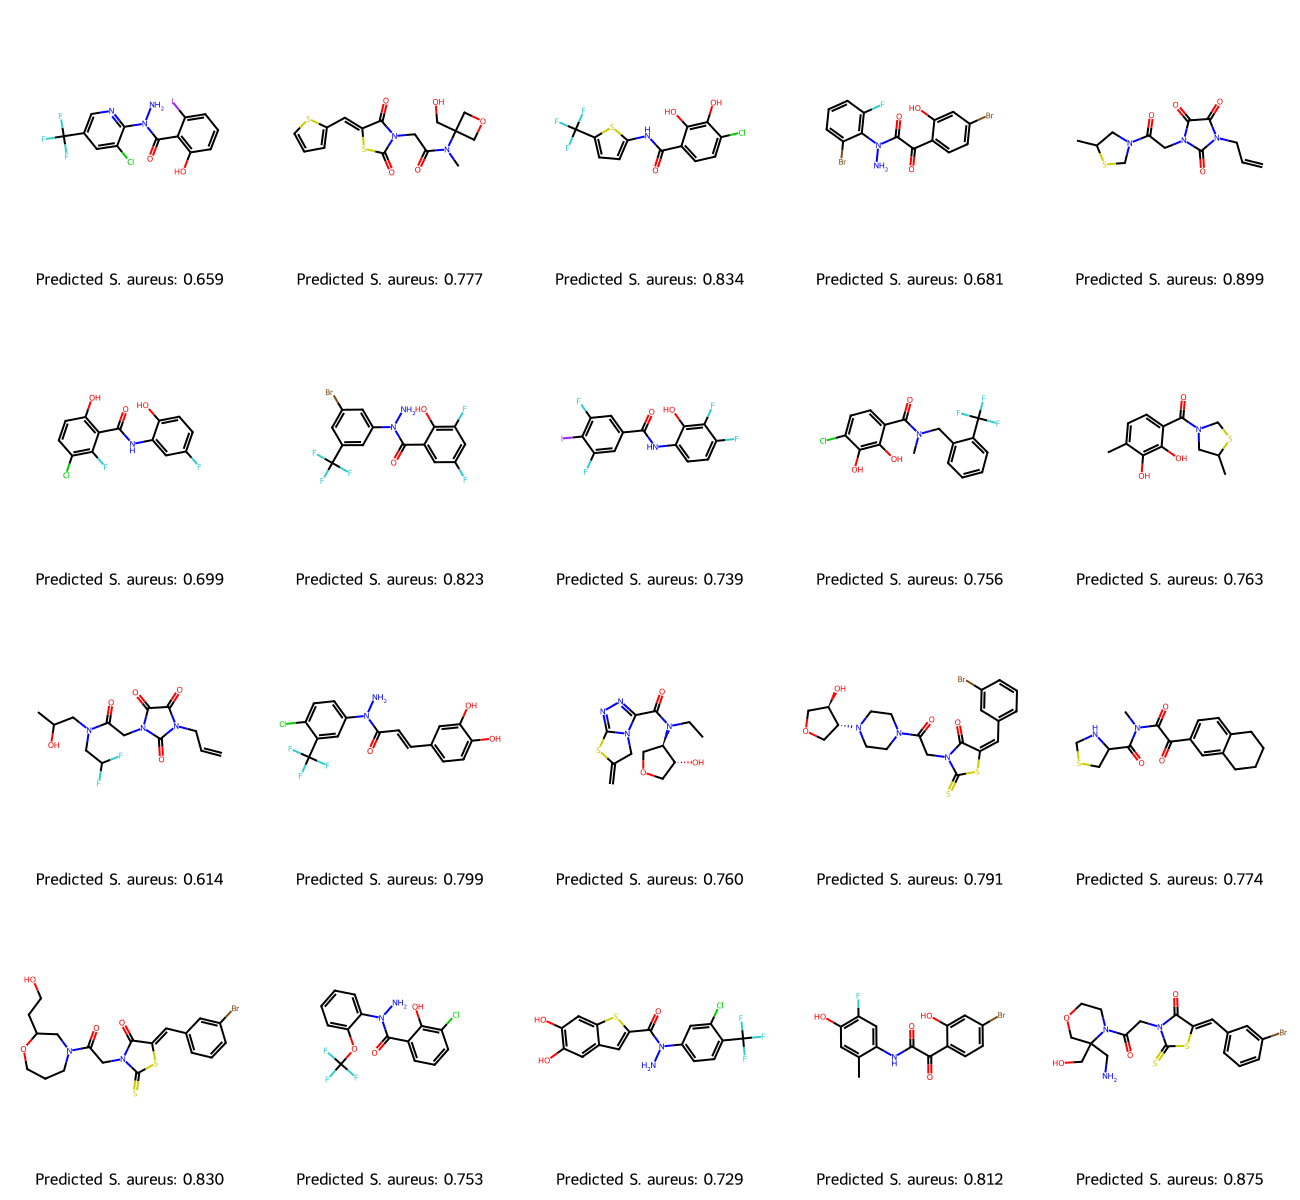

In [5]:
# RL-Chremprop molecules
Draw.MolsToGridImage(
    rl_chemprop_mols,
    molsPerRow=5,
    subImgSize=(260, 300),
    legends=[f"Predicted S. aureus: {value:.3f}" for value in rl_chemprop_activities]
)

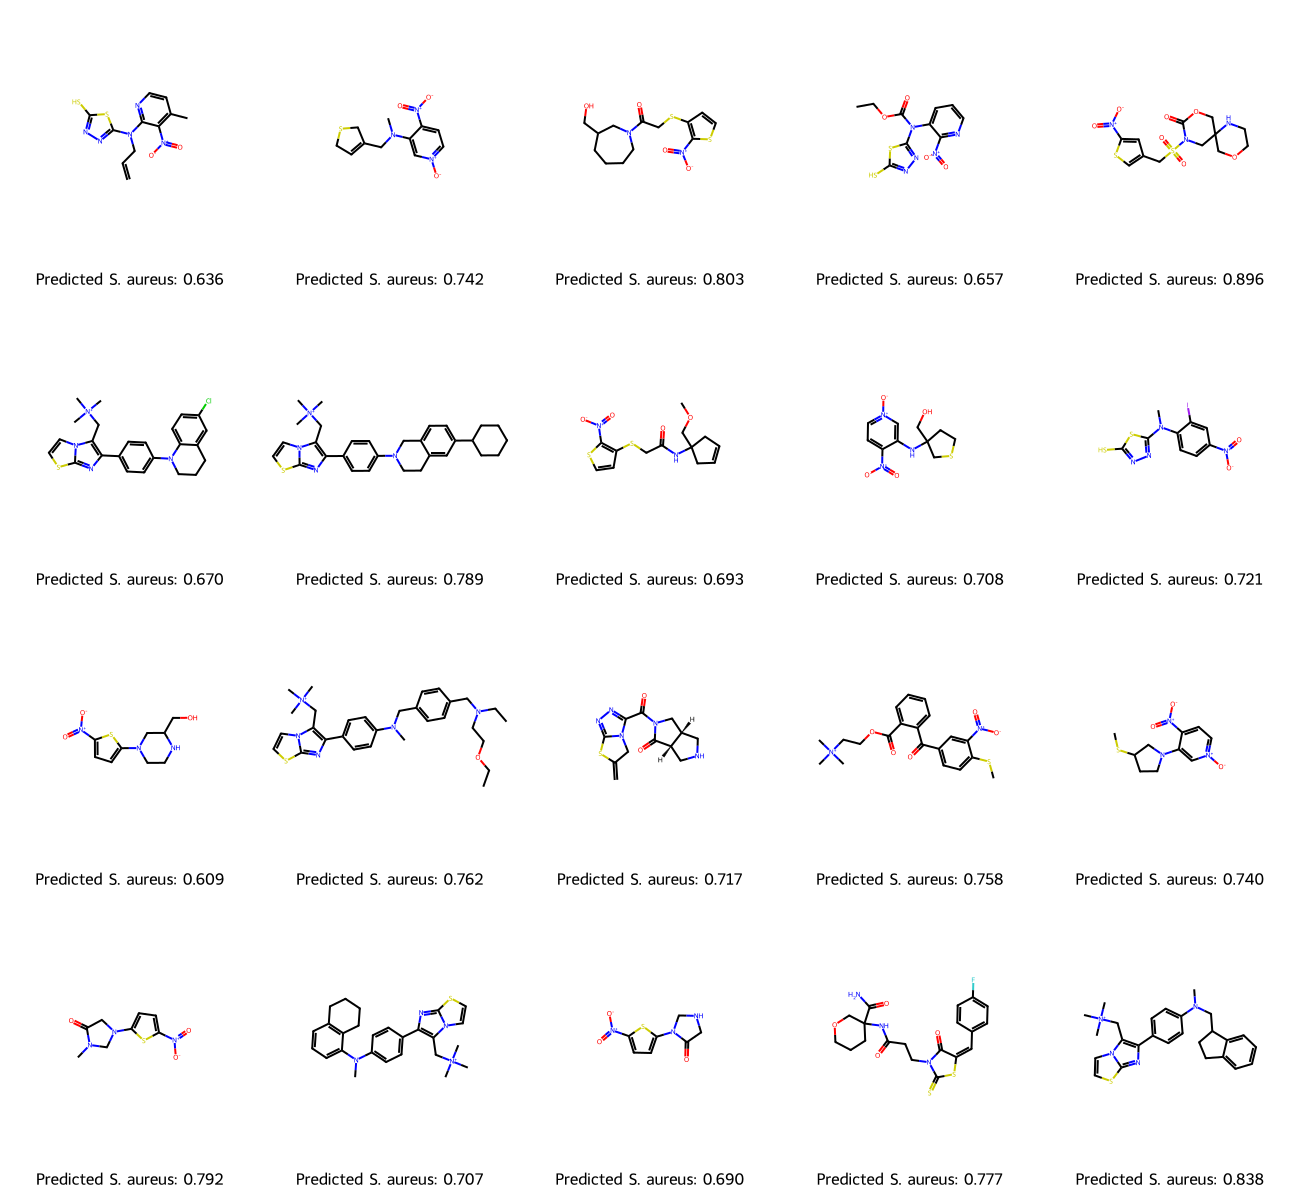

In [6]:
# RL-MLP molecules
Draw.MolsToGridImage(
    rl_mlp_mols,
    molsPerRow=5,
    subImgSize=(260, 300),
    legends=[f"Predicted S. aureus: {value:.3f}" for value in rl_mlp_activities]
)